# Detect peaks from calcium imaging data. 
## owner : TANIYA MANDAL @ Shaon lab, Siomns Centre, NCBS
## Data provided by Yojet Sharma @ Raghu lab, NCBS
For any issue related to this code, drop a mail to tmandal521@gmail.com

In [145]:
# Import data and load the modules required for processing.

import pandas as pd
import scipy.signal as sp
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

# raw_data = pd.read_excel('test1.xlsx')
# raw_data.head()


,ROI 87,ROI 88,ROI 89,ROI 90,ROI 91,ROI 92,ROI 93,ROI 94,ROI 95,ROI 96
0,4411.37500,4646.95459,4343.98340,5422.6665,4258.3999,4375.37109,5199.09521,5938.51416,4072.64282,4109.80859
1,4553.68750,4779.54541,4456.75391,5534.2915,4382.6333,4464.48389,5259.00000,6066.57129,4096.60693,4265.97070
2,4612.40625,4750.04541,4425.88525,5552.5835,4407.6333,4463.87109,5248.33350,6081.00000,4153.50000,4252.36768
3,4562.46875,4722.40918,4416.83594,5517.3540,4363.8999,4500.35498,5263.76172,6136.77148,4154.75000,4283.97070
4,4518.40625,4664.45459,4444.55762,5526.3960,4358.2334,4518.27441,5231.04785,6181.17139,4210.03564,4289.89697


In [85]:
# calculate first derivative from normalised raw data.

def derivative1(df):
    df_norm = df.copy()
    df_deriv = df.copy()
    for column in df.columns:
        df_norm[column] = df_norm[column]  / df_norm[column][0]
        df_deriv[column][0] = df_norm[column][0]
        for i in range(1,len(df_norm[column])):
            df_deriv[column][i] = df_norm[column][i]-df_norm[column][i-1]
    return df_deriv

# print(norm_data)

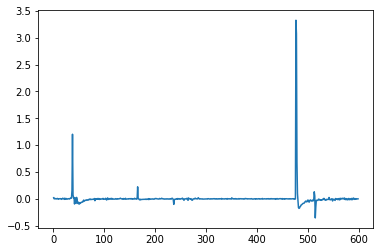

In [146]:
# call the function and visualize the spikes.
norm_data = derivative1(raw_data)
plt.plot(norm_data.iloc[1:,5])

In [147]:
#  calculate the threshold for each ROI and create input dataframe for peak detection.

def threshold(df, start = 300, end = 350):
    df_noise = df.iloc[start:end,:]
    avg = df_noise.mean()
    stdev = 2*df_noise.std(0) + avg
    return stdev
    
thresh_out = threshold(norm_data) 

In [151]:
#define the function that detects the peaks and retuns the no. of peaks in each ROI

def detect_peak(normalized_data, threshold):
    counts = []
    #extract the columns of the dataframe
    columns = normalized_data.columns
    for i in normalized_data.columns:
        x = normalized_data[i]
        thresH = threshold[i]
        z,_ = sp.find_peaks(x, thresH)
        counts.append(len(z))
    counts = np.asarray(counts)
    final_counts = counts[np.nonzero(counts)]
    return final_counts

#calling the function and print the results
count_result = detect_peak(norm_data, thresh_out)
print('no. of peaks = ',count_result)
df_peak_count = {'peak_count':count_result}
df_peak_count = pd.DataFrame(df, columns = ['peak_count'])

# export your results in a excel sheet
# df_peak_count.to_excel('peak_count.xlsx') 

no. of peaks =  [77 44 38 40 39 57 49 57 39 33]


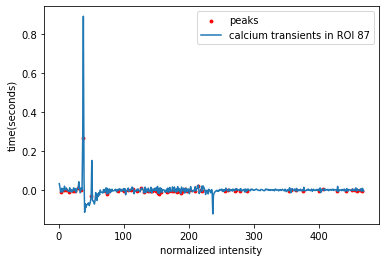

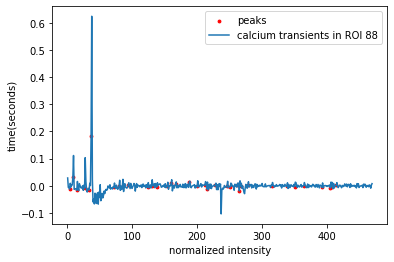

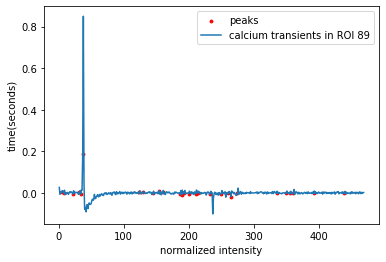

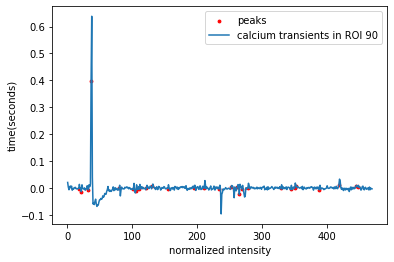

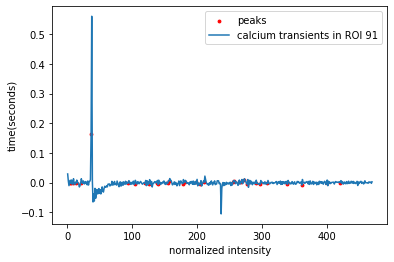

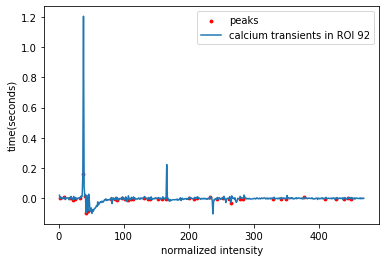

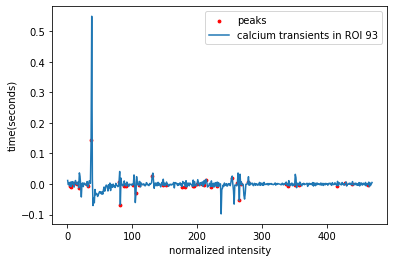

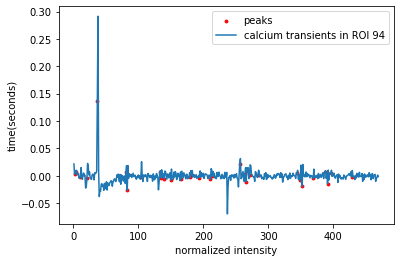

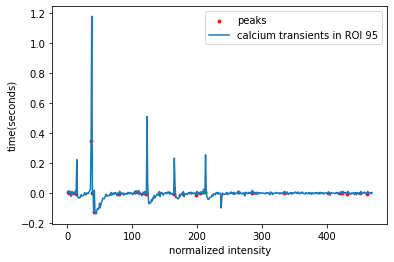

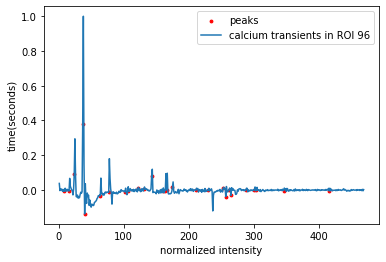

In [157]:
#plot the data to see how it looks

def plot_peaks(normalized_data, threshold, start = 1, end = 470):
    for i in normalized_data.columns:
        a, _ = sp.find_peaks(normalized_data[i][start:end].values, height=threshold[i])
        plt.figure()
        plt.scatter(a,normalized_data[i][a],c = 'r',s = 8, label = 'peaks')
        plt.plot(normalized_data[i][start:end],label = f'calcium transients in {i}')
        plt.xlabel('normalized intensity')
        plt.ylabel('time(seconds)')
        plt.legend()
        # save the images
        # plt.savefig('peak_detection.png')
        # plt.show()
        
plot_peaks(norm_data, avg_out)